In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset from the provided URL
url = "https://github.com/raccamateo/NEC_BP_LR/raw/27108ebc3b574afd3f4bd7ea8b5d025907332499/A1-synthetic.txt"
synthetic_data = pd.read_csv(url, sep='\t')

In [3]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(synthetic_data.head())

First few rows of the dataset:
         #v1         v2        v3        v4          v5        v6         v7  \
0  37.344110  10.542156  0.969185  3.568534   96.798733  3.429026  75.810196   
1   4.089849  11.894301  0.467775  1.279044  100.149383  3.190073  76.423095   
2 -32.333439  10.968631  0.238486  1.410745  100.642075  3.093934  78.758727   
3 -45.632977  11.509606  0.924938  3.404069  105.963016  2.884269  83.027750   
4 -41.543394  10.117186  0.315180  1.020120   97.371423  2.815820  77.194463   

   v8         v9          z  
0   0  20.002459  11.805369  
1   0  12.702628   5.125025  
2   1  10.723848   3.218553  
3   0  19.946593  12.955092  
4   0  11.105024   1.919094  


In [4]:
# Checking for Missing Values
missing_values = synthetic_data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
#v1    0
v2     0
v3     0
v4     0
v5     0
v6     0
v7     0
v8     0
v9     0
z      0
dtype: int64


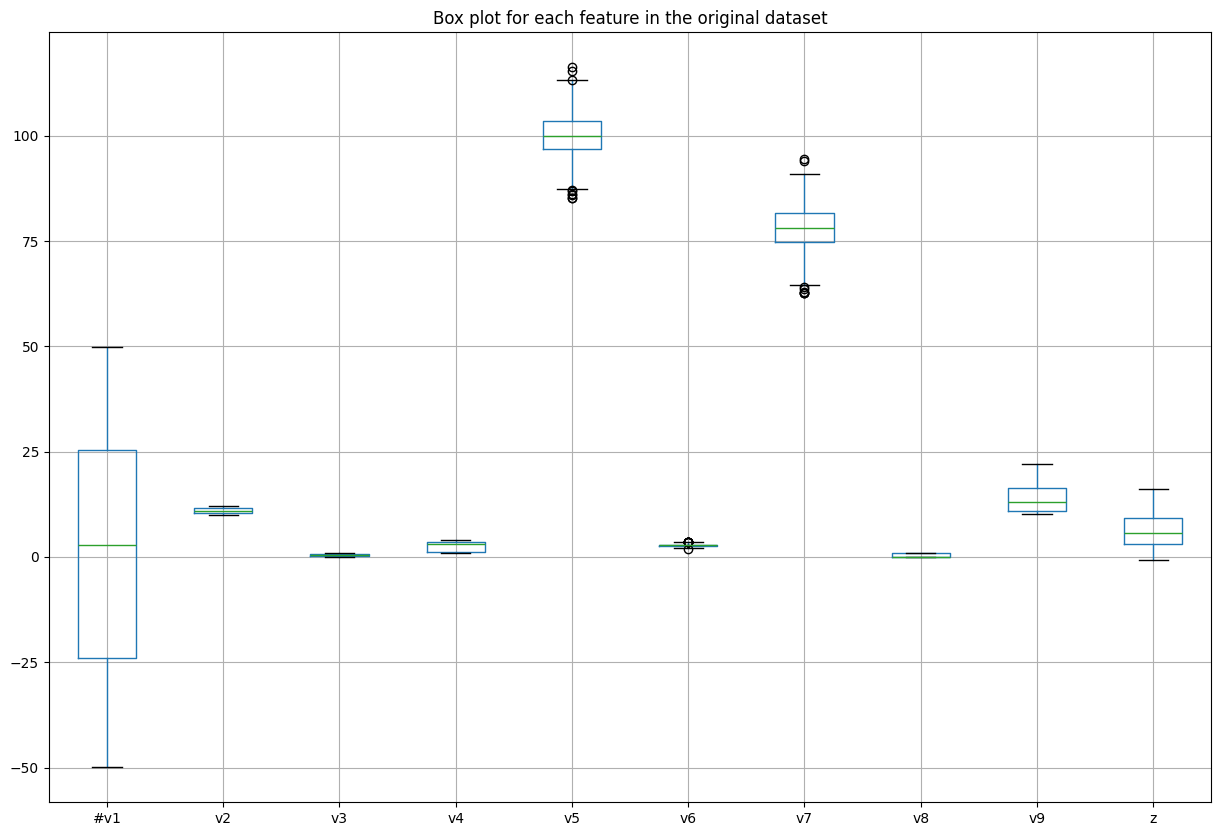

In [5]:
# Looking for Outliers using box plots on the original data (before normalization)
plt.figure(figsize=(15, 10))
synthetic_data.boxplot()
plt.title("Box plot for each feature in the original dataset")
plt.show()

In [6]:
def scale_features(df, target_column, feature_range=(0.1, 0.9)):
    df_scaled = df.copy()
    for column in df.columns:
        if column != target_column:  # Skip the target column
            col_min = df[column].min()
            col_max = df[column].max()
            df_scaled[column] = feature_range[0] + (feature_range[1] - feature_range[0]) * (df[column] - col_min) / (col_max - col_min)
    return df_scaled

In [7]:
normalized_synthetic_data = scale_features(synthetic_data, target_column=synthetic_data.columns[-1], feature_range=(0.1, 0.9))

In [8]:
# Shuffle the dataset
normalized_synthetic_data = normalized_synthetic_data.sample(frac=1, random_state=0).reset_index(drop=True)

In [9]:
normalized_synthetic_data.to_csv('normalized_synthetic_data.csv', index=False)

In [10]:
# Calculate the number of samples for training (80%) and testing (20%)
num_samples = len(normalized_synthetic_data)
train_size = int(num_samples * 0.8)
test_size = num_samples - train_size

In [11]:
# Split the dataset
train_data_synthetic = normalized_synthetic_data.iloc[:train_size]
test_data_synthetic = normalized_synthetic_data.iloc[train_size:]

In [12]:
# Separate the features and the target variable for training data
X_train_synthetic = train_data_synthetic.iloc[:, :-1]
y_train_synthetic = train_data_synthetic.iloc[:, -1]

# Separate the features and the target variable for test data
X_test_synthetic = test_data_synthetic.iloc[:, :-1]
y_test_synthetic = test_data_synthetic.iloc[:, -1]

In [13]:
# Displaying the first few rows of the training and test sets
print("Training features:")
print(X_train_synthetic.head())
print("\nTraining target:")
print(y_train_synthetic.head())
print("\nTest features:")
print(X_test_synthetic.head())
print("\nTest target:")
print(y_test_synthetic.head())

Training features:
        #v1        v2        v3        v4        v5        v6        v7   v8  \
0  0.585020  0.482674  0.614437  0.825444  0.637827  0.620912  0.642547  0.1   
1  0.851893  0.106523  0.735879  0.768045  0.632080  0.695421  0.682839  0.1   
2  0.512497  0.456258  0.324794  0.105883  0.369727  0.665192  0.384359  0.1   
3  0.774855  0.158844  0.368012  0.216555  0.512540  0.364475  0.561547  0.1   
4  0.776973  0.616325  0.608248  0.896871  0.504050  0.505526  0.495773  0.1   

         v9  
0  0.403592  
1  0.524017  
2  0.157653  
3  0.176348  
4  0.405366  

Training target:
0    7.984439
1    7.678250
2    1.310445
3    2.819382
4    8.185281
Name: z, dtype: float64

Test features:
          #v1        v2        v3        v4        v5        v6        v7  \
800  0.594772  0.224874  0.729830  0.894415  0.420174  0.305072  0.462100   
801  0.740083  0.656068  0.144527  0.161650  0.524639  0.575675  0.510062   
802  0.541821  0.472557  0.569200  0.788201  0.421480  0.